<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Microsoft_Stock_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("MSFT.csv")
print(data.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063628   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064725   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063079    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061982    47894400


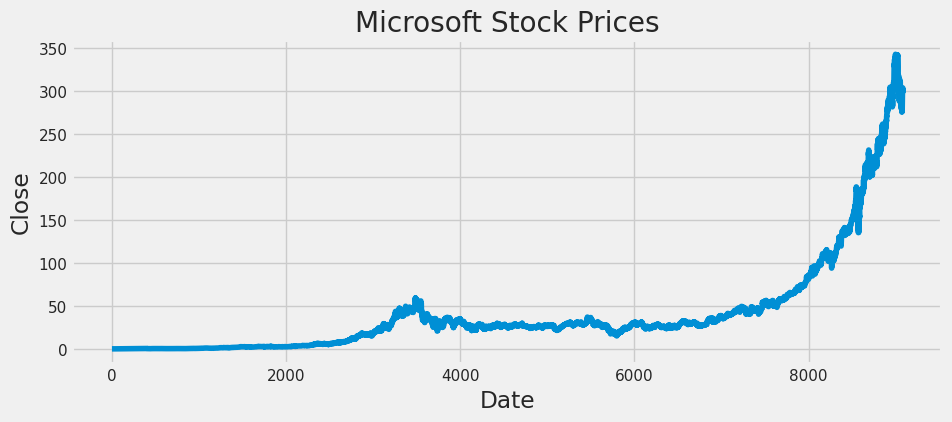

In [8]:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999934  0.999924  0.999854   0.997546 -0.302497
High       0.999934  1.000000  0.999891  0.999921   0.997545 -0.300973
Low        0.999924  0.999891  1.000000  0.999925   0.997675 -0.304221
Close      0.999854  0.999921  0.999925  1.000000   0.997691 -0.302686
Adj Close  0.997546  0.997545  0.997675  0.997691   1.000000 -0.304574
Volume    -0.302497 -0.300973 -0.304221 -0.302686  -0.304574  1.000000


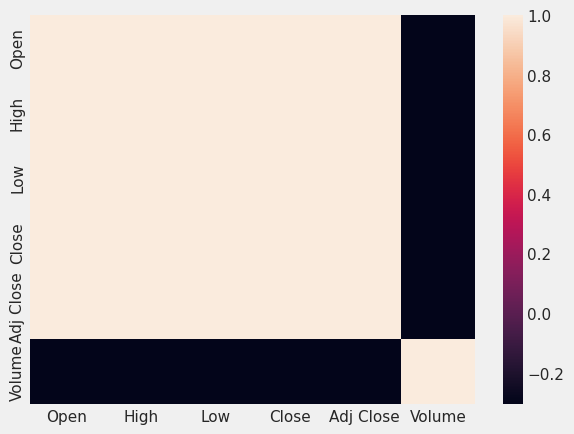

In [10]:
# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the correlation matrix, excluding non-numeric columns
print(data.corr(numeric_only=True))
sns.heatmap(data.corr(numeric_only=True))
plt.show()

In [11]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0       46.610001
1       28.350000
2        4.445313
3       25.859375
4      145.960007
